In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('work_from_home_burnout_dataset.csv')
df.head()

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,1,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,1,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,1,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,1,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1800 non-null   int64  
 1   day_type              1800 non-null   str    
 2   work_hours            1800 non-null   float64
 3   screen_time_hours     1800 non-null   float64
 4   meetings_count        1800 non-null   int64  
 5   breaks_taken          1800 non-null   int64  
 6   after_hours_work      1800 non-null   int64  
 7   sleep_hours           1800 non-null   float64
 8   task_completion_rate  1800 non-null   float64
 9   burnout_score         1800 non-null   float64
 10  burnout_risk          1800 non-null   str    
dtypes: float64(5), int64(4), str(2)
memory usage: 154.8 KB


In [4]:
df.shape

(1800, 11)

In [5]:
df.isna().sum()

user_id                 0
day_type                0
work_hours              0
screen_time_hours       0
meetings_count          0
breaks_taken            0
after_hours_work        0
sleep_hours             0
task_completion_rate    0
burnout_score           0
burnout_risk            0
dtype: int64

In [6]:
print(df.duplicated().sum())

0


In [7]:
df.describe()

,user_id,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,90.500000,6.515117,9.271406,1.941111,3.028889,0.358889,6.996467,72.308556,44.009978
std,51.975162,2.290521,2.409253,1.696178,1.417844,0.479808,1.061740,14.978647,23.881782
min,1.000000,3.000000,4.510000,0.000000,1.000000,0.000000,4.500000,40.000000,2.500000
25%,45.750000,4.430000,7.240000,1.000000,2.000000,0.000000,6.280000,62.300000,25.370000
50%,90.500000,6.445000,9.210000,2.000000,3.000000,0.000000,6.990000,74.500000,39.270000
75%,135.250000,8.510000,11.310000,3.000000,4.000000,1.000000,7.750000,83.700000,58.197500
max,180.000000,12.170000,15.700000,10.000000,5.000000,1.000000,10.800000,107.200000,143.920000


In [8]:
df = df.drop('user_id', axis=1)

In [9]:
df.head()

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low


In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day_type              1800 non-null   str    
 1   work_hours            1800 non-null   float64
 2   screen_time_hours     1800 non-null   float64
 3   meetings_count        1800 non-null   int64  
 4   breaks_taken          1800 non-null   int64  
 5   after_hours_work      1800 non-null   int64  
 6   sleep_hours           1800 non-null   float64
 7   task_completion_rate  1800 non-null   float64
 8   burnout_score         1800 non-null   float64
 9   burnout_risk          1800 non-null   str    
dtypes: float64(5), int64(3), str(2)
memory usage: 140.8 KB


In [11]:
df['day_type'].value_counts() , df['day_type'].unique()

(day_type
 Weekend    924
 Weekday    876
 Name: count, dtype: int64,
 <StringArray>
 ['Weekday', 'Weekend']
 Length: 2, dtype: str)

In [12]:
df.columns

Index(['day_type', 'work_hours', 'screen_time_hours', 'meetings_count',
       'breaks_taken', 'after_hours_work', 'sleep_hours',
       'task_completion_rate', 'burnout_score', 'burnout_risk'],
      dtype='str')

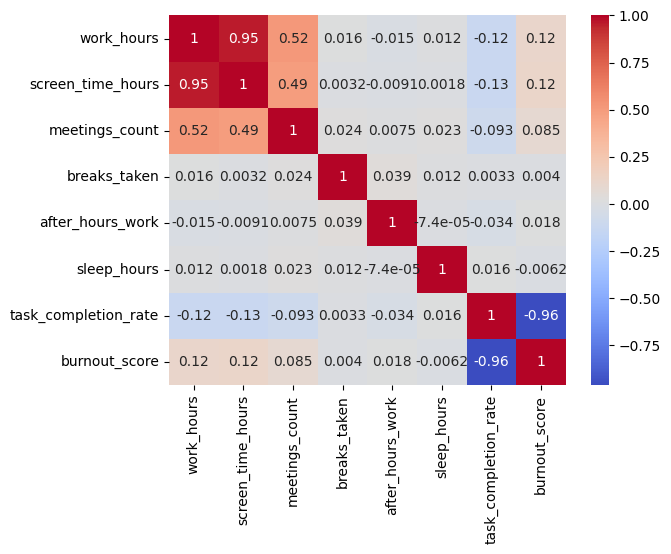

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

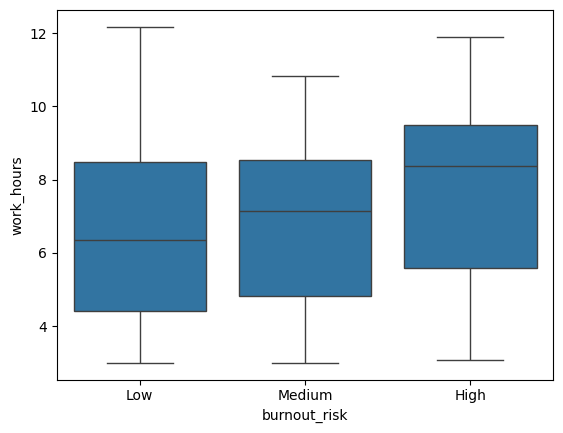

In [14]:
sns.boxplot(data= df, x='burnout_risk', y='work_hours')
plt.show()

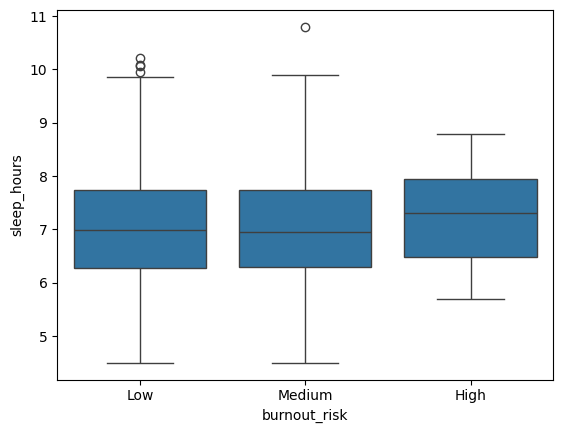

In [15]:
sns.boxplot(data=df, x='burnout_risk', y='sleep_hours')
plt.show()

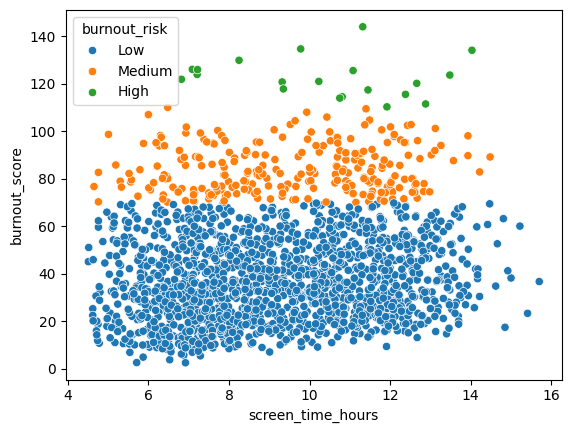

In [16]:
sns.scatterplot(data=df,
                x="screen_time_hours",
                y="burnout_score",
                hue="burnout_risk")
plt.show()

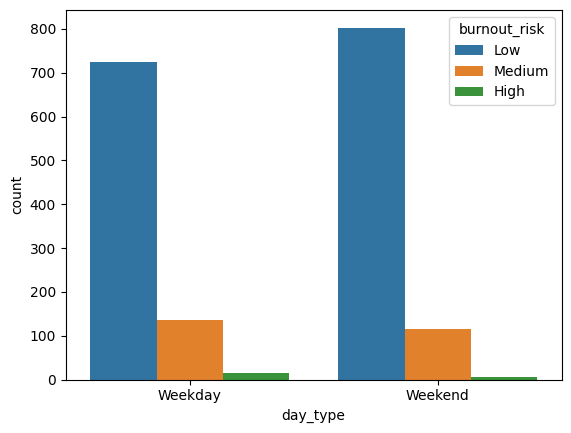

In [17]:
sns.countplot(x='day_type', hue='burnout_risk', data=df)
plt.show()

In [18]:
df['burnout_risk'].value_counts()

burnout_risk
Low       1527
Medium     253
High        20
Name: count, dtype: int64

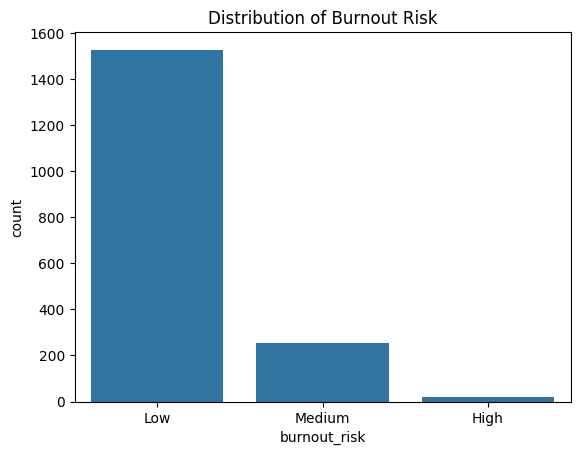

In [19]:
sns.countplot(x='burnout_risk', data=df)
plt.title('Distribution of Burnout Risk')   
plt.show()

In [20]:
df.head()

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low


In [21]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day_type              1800 non-null   str    
 1   work_hours            1800 non-null   float64
 2   screen_time_hours     1800 non-null   float64
 3   meetings_count        1800 non-null   int64  
 4   breaks_taken          1800 non-null   int64  
 5   after_hours_work      1800 non-null   int64  
 6   sleep_hours           1800 non-null   float64
 7   task_completion_rate  1800 non-null   float64
 8   burnout_score         1800 non-null   float64
 9   burnout_risk          1800 non-null   str    
dtypes: float64(5), int64(3), str(2)
memory usage: 140.8 KB


In [22]:
df_clean = df.copy()
df_clean.head()


,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low


In [23]:
#df_clean['day_type'] = df_clean['day_type'].map({'weekday': 0, 'weekend': 1})


In [24]:
df_clean['day_type'] , _= pd.factorize(df_clean['day_type'])

In [25]:
df_clean.head()

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,0,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,1,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,1,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,0,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,1,6.97,9.83,1,2,0,5.85,67.1,51.61,Low


In [26]:
df_clean.info()

<class 'pandas.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   day_type              1800 non-null   int64  
 1   work_hours            1800 non-null   float64
 2   screen_time_hours     1800 non-null   float64
 3   meetings_count        1800 non-null   int64  
 4   breaks_taken          1800 non-null   int64  
 5   after_hours_work      1800 non-null   int64  
 6   sleep_hours           1800 non-null   float64
 7   task_completion_rate  1800 non-null   float64
 8   burnout_score         1800 non-null   float64
 9   burnout_risk          1800 non-null   str    
dtypes: float64(5), int64(4), str(1)
memory usage: 140.8 KB


In [27]:
df_clean.select_dtypes(include=['object'])

C:\Users\mahmo\AppData\Local\Temp\ipykernel_14312\716499732.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df_clean.select_dtypes(include=['object'])


,burnout_risk
0,Low
1,Low
2,Low
3,Low
4,Low
...,...
1795,Low
1796,Low
1797,Low
1798,Low


In [28]:
df_clean['burnout_risk'], _ = pd.factorize(df_clean['burnout_risk'])

In [29]:
df_clean.head()

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,0,9.59,11.86,4,2,0,7.55,91.2,19.17,0
1,1,7.38,10.33,4,1,0,6.69,82.0,29.70,0
2,1,6.31,8.92,1,2,0,8.87,80.6,32.93,0
3,0,8.34,10.70,4,1,1,8.13,70.0,45.47,0
4,1,6.97,9.83,1,2,0,5.85,67.1,51.61,0


In [30]:
from sklearn.model_selection import train_test_split
x = df_clean.drop('burnout_risk', axis=1)
y = df_clean['burnout_risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [31]:
x_train.shape , x_test.shape


((1440, 9), (360, 9))